# Instalando o Pycaret

In [43]:
#!pip install pycaret

In [44]:
#!pip install scipy

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import shap
from pycaret.regression import *
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Tratando a base

In [52]:
df= pd.read_excel("Base_novos_dados.xlsx")

In [53]:
df = df[['cod_municipio_ibge','qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59','pop_total','total_sim_tecnologia','porte_municipio']]

In [54]:
df.head()

,cod_municipio_ibge,qtd_abertas_Empresario_Individual,Mecanismos_incentivo,Reducao_IPTU,Isencao_IPTU,Reducao_ISSQN,Isencao_ISSQN,Isencao_Tx,Cessao_terrenos,Doacao_terrenos,...,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,media_NU_NOTA_REDACAO,valor_medio_recebido_familia,pib_per_capita_preco_corrente,perc_20_59,pop_total,total_sim_tecnologia,porte_municipio
0,110001,167,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,543.020270,495.929730,502.991429,453.783784,15747,21538.40,0.583805,23167,18.0,2
1,110002,1058,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,...,549.247267,513.304727,512.975890,461.418021,14890,23215.13,0.584291,106168,12.0,4
2,110003,50,Sim,Não,Não,Não,Sim,Não,Não,Não,...,506.685185,466.007407,484.925000,391.111111,14451,25837.30,0.582567,5438,8.0,1
3,110004,987,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,...,549.739357,513.924809,524.946720,482.419602,15214,25654.56,0.593918,84813,17.0,3
4,110005,181,Sim,Não,Sim,Não,Não,Não,Não,Não,...,551.494737,498.394737,493.949296,440.789474,15255,28621.22,0.594503,16444,8.0,2


In [55]:
df['qtd_cursos_engenharias'] = df['qtd_cursos_engenharias'].fillna(0)

df['qtd_cursos_negocios_direito'] = df['qtd_cursos_negocios_direito'].fillna(0)

df['total_sim_tecnologia'] = df['total_sim_tecnologia'].fillna(0)

df['taxa_homicidio'] = df['taxa_homicidio'].fillna(0)

df['RH_adm_dir'] = df['RH_adm_dir'].fillna(0)

In [56]:
df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [57]:
df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [9]:
df = pd.get_dummies(df, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [10]:
df = df[np.isfinite(df).all(1)]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cod_municipio_ibge                 5570 non-null   int64  
 1   qtd_abertas_Empresario_Individual  5570 non-null   int64  
 2   taxa_homicidio                     5570 non-null   float64
 3   RH_adm_dir                         5570 non-null   float64
 4   densidade_banda_larga              5570 non-null   float64
 5   densidade_telefonia_movel          5570 non-null   float64
 6   qtd_cursos_engenharias             5570 non-null   float64
 7   qtd_cursos_negocios_direito        5570 non-null   float64
 8   media_notas_CN                     5570 non-null   float64
 9   media_notas_CH                     5570 non-null   float64
 10  media_NU_NOTA_LC                   5570 non-null   float64
 11  media_NU_NOTA_MT                   5570 non-null   float

In [12]:
df = df.set_index('cod_municipio_ibge')

# Dividindo em treino e test

Adaleny, fiz a divisão de treino e teste baseado na estratificação

In [13]:
treino = df.groupby('porte_municipio', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state = 123))

teste = df.drop(treino.index)

print(treino.shape, teste.shape)

(4177, 31) (1393, 31)


In [14]:
# vamos separar duas bases, uma para treino e outra para teste
#treino = df.sample(frac=.8, random_state=123)
#treino.reset_index(inplace=True, drop=True)


#teste = df.drop(treino.index)
#teste.reset_index(inplace=True, drop=True)

#print(treino.shape, teste.shape)

#peguei esse do colab que compartilhou comigo, depois queria entender a formatação dele

In [15]:
treino = treino.drop('porte_municipio', axis = 1)
teste= teste.drop('porte_municipio', axis = 1)

In [16]:
#teste= teste.drop('qtd_abertas_Empresario_Individual', axis = 1)

In [17]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 110005 to 530010
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   qtd_abertas_Empresario_Individual  1393 non-null   int64  
 1   taxa_homicidio                     1393 non-null   float64
 2   RH_adm_dir                         1393 non-null   float64
 3   densidade_banda_larga              1393 non-null   float64
 4   densidade_telefonia_movel          1393 non-null   float64
 5   qtd_cursos_engenharias             1393 non-null   float64
 6   qtd_cursos_negocios_direito        1393 non-null   float64
 7   media_notas_CN                     1393 non-null   float64
 8   media_notas_CH                     1393 non-null   float64
 9   media_NU_NOTA_LC                   1393 non-null   float64
 10  media_NU_NOTA_MT                   1393 non-null   float64
 11  media_NU_NOTA_REDACAO              1393 non-null 

# Pycaret

## Setup

In [18]:
regression_setup = setup(data = treino, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

,Description,Value
0,Session id,42
1,Target,qtd_abertas_Empresario_Individual
2,Target type,Regression
3,Original data shape,"(4177, 30)"
4,Transformed data shape,"(4177, 30)"
5,Transformed train set shape,"(2923, 30)"
6,Transformed test set shape,"(1254, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


## Comparando Modelos 

### Usando MAPE

In [19]:
best_model = compare_models(sort = 'RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lar,Least Angle Regression,172.8318,263223.4976,484.5760,0.9597,1.1999,2.8447,0.2740
lr,Linear Regression,172.3592,263681.8305,484.8990,0.9597,1.1948,2.8320,1.1700
ridge,Ridge Regression,172.3374,264701.1183,485.8460,0.9595,1.1975,2.8399,0.2520
llar,Lasso Least Angle Regression,172.4255,267305.3753,488.0197,0.9591,1.2252,2.8677,0.2800
lasso,Lasso Regression,172.4259,267313.3857,488.0248,0.9591,1.2252,2.8677,0.6200
en,Elastic Net,169.8369,273752.6326,492.6846,0.9585,1.2118,2.8004,0.2740
br,Bayesian Ridge,169.6394,280552.7258,497.8448,0.9579,1.1957,2.7681,0.2740
huber,Huber Regressor,124.0117,387724.7279,585.6866,0.9356,0.6966,0.7281,0.2980
omp,Orthogonal Matching Pursuit,175.5604,371964.1815,593.3124,0.9317,1.1795,2.6062,0.2840
et,Extra Trees Regressor,106.7456,2129691.0507,935.1865,0.8871,0.4277,0.4228,0.6300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [20]:
# verificando os hiperparâmetros do modelo 

print(best_model)

Lars(random_state=42)


In [31]:
best_model = create_model('lar', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,176.7084,388652.4558,623.4200,0.9225,1.1140,2.4980
1,185.8044,502199.0796,708.6601,0.9794,1.2129,3.1660
2,175.0223,181041.3721,425.4896,0.9697,1.2195,2.7990
3,149.8212,50912.1126,225.6371,0.9826,1.2347,3.1538
4,176.8027,193312.4680,439.6731,0.9441,1.2183,2.6068
Mean,172.8318,263223.4976,484.5760,0.9597,1.1999,2.8447
Std,12.1109,160971.6313,168.5516,0.0230,0.0436,0.2748


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Plotando alguns graficos 

In [32]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

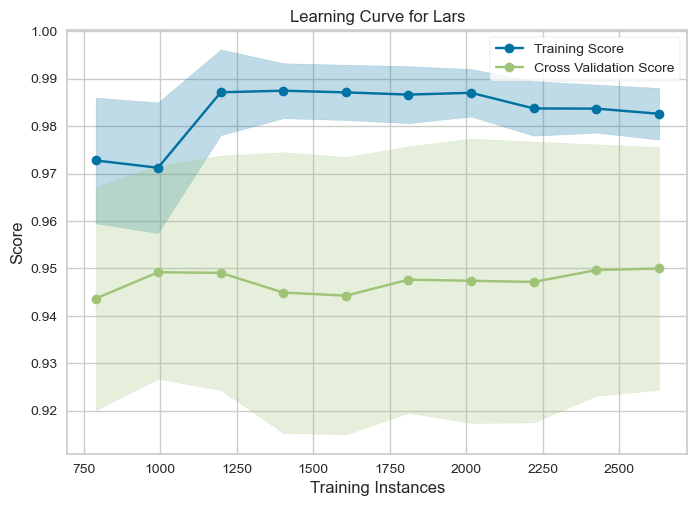

In [33]:
plot_model(best_model, plot = 'learning')

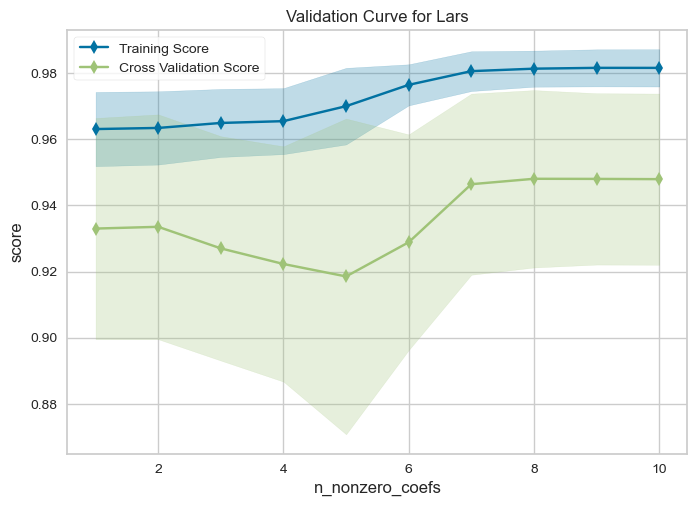

In [34]:
plot_model(best_model, plot='vc')

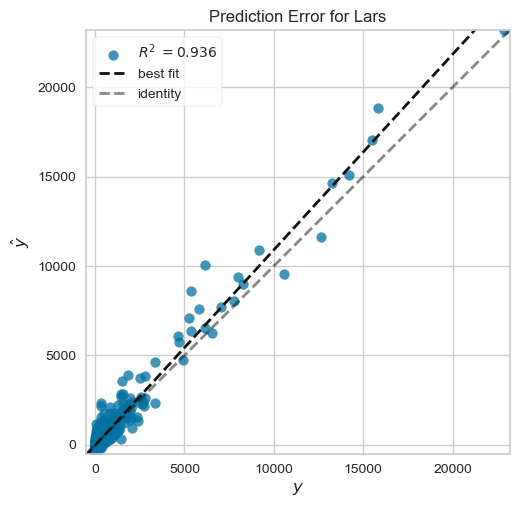

In [35]:
plot_model(best_model, plot='error')

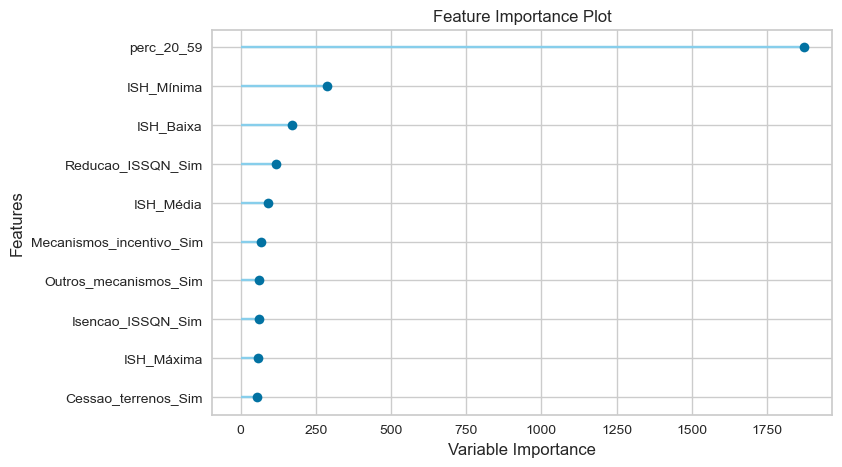

In [36]:
plot_model(best_model, plot='feature')

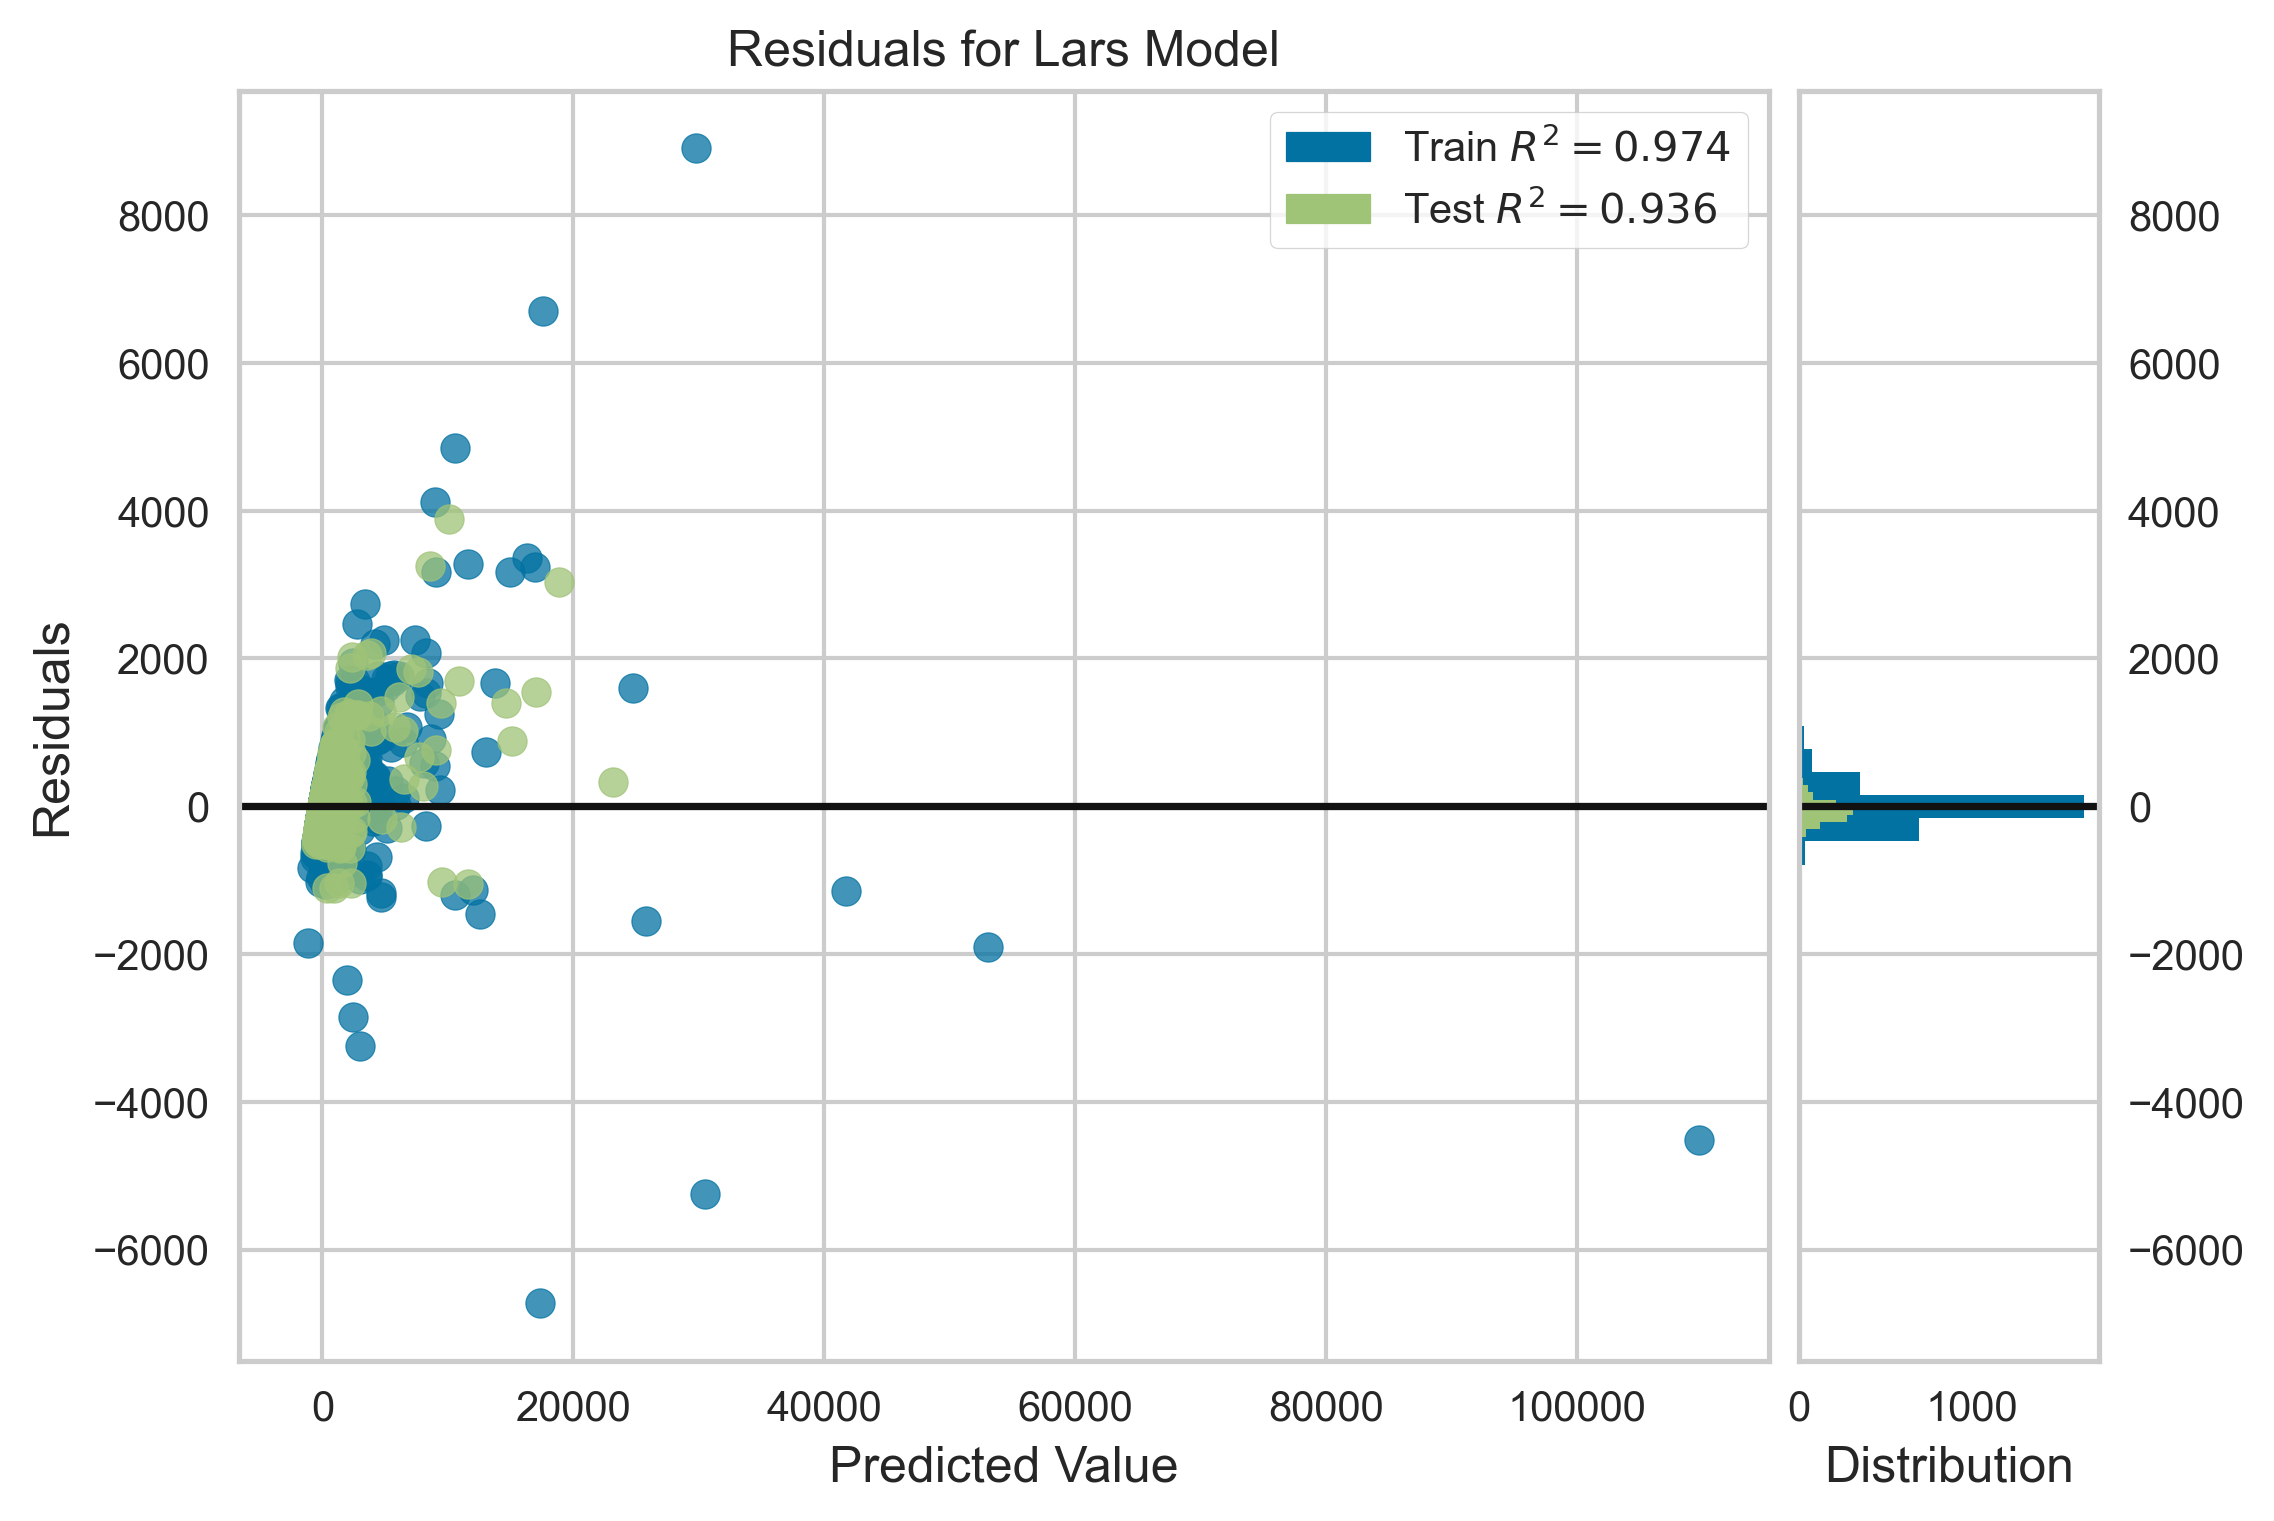

In [37]:
plot_model(best_model, plot='residuals',  scale = 3)

### Tunando o modelo

In [38]:
# em alguns tutoriais vi que não fizeram nenhuma modificação manual dos parametros, e eles já modificavam. 
#Esse parece que não conteceu do mesmo jeito. 

tuned = tune_model(best_model, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,176.8544,388379.9310,623.2014,0.9226,1.1489,2.4445
1,185.8666,496183.5515,704.4030,0.9797,1.2287,3.2474
2,175.2833,179413.6655,423.5725,0.9700,1.2193,2.8012
3,150.6344,51233.4825,226.3481,0.9825,1.2399,3.1601
4,177.1289,193668.2037,440.0775,0.9440,1.2139,2.5848
Mean,173.1535,261775.7668,483.5205,0.9598,1.2102,2.8476
Std,11.8556,159201.6540,167.2833,0.0230,0.0319,0.3134


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [39]:
#estranho, era para monstrar o que foi testado de diferente com o tuned, parece que esta igual.
#Sem falar que os resultados parecem piores depois de tunar 

print(tuned)

Lars(eps=0.0001, fit_intercept=False, random_state=42)


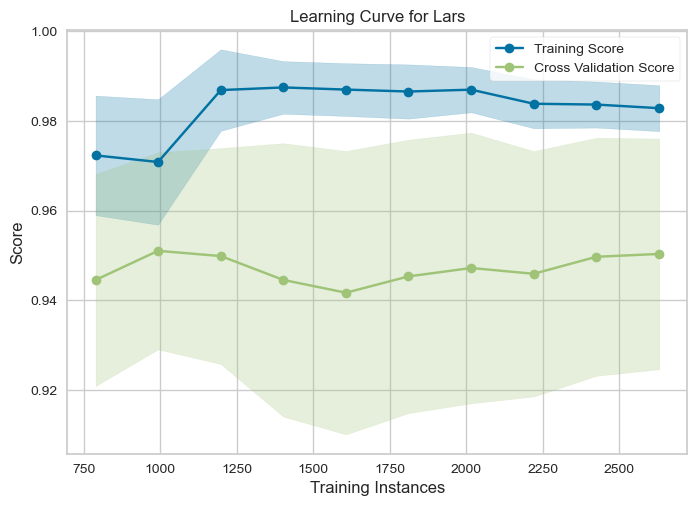

In [40]:
plot_model(tuned, plot = 'learning')  #use_train_data = True

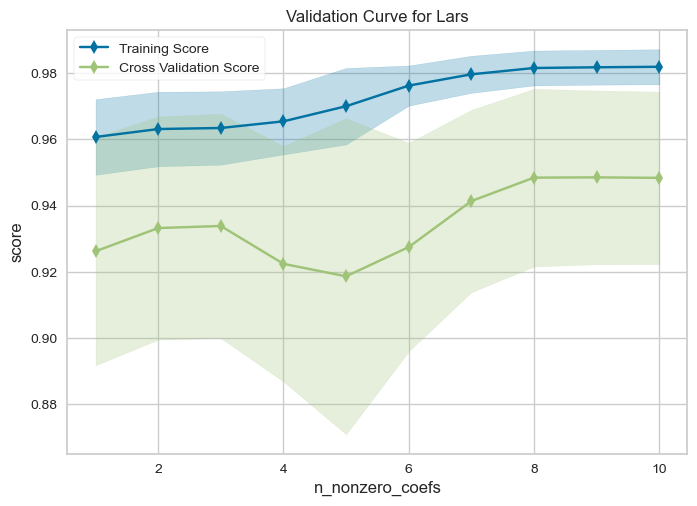

In [41]:
# Validation Curve
plot_model(tuned, plot='vc')


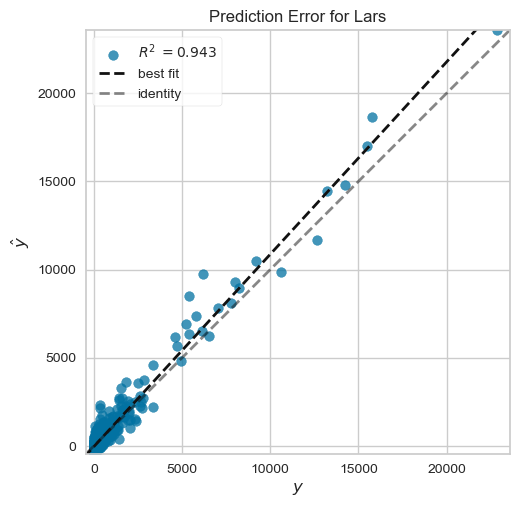

In [42]:
plot_model(tuned, plot='error')

# O R² esta bem baixo 

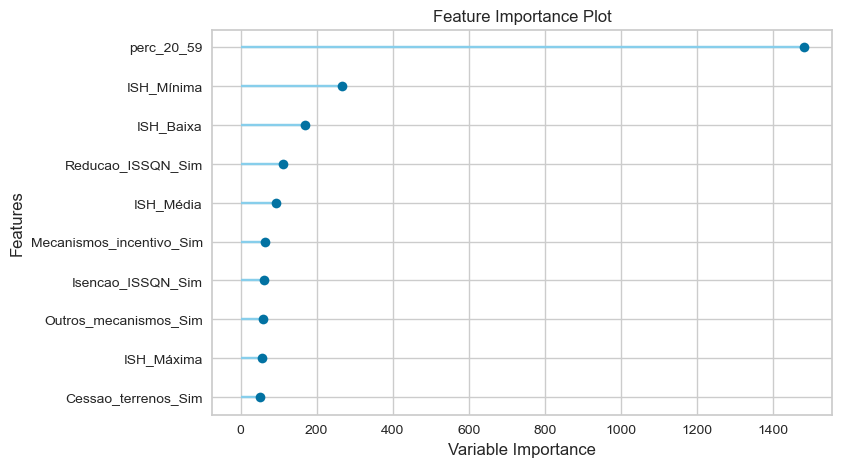

In [43]:
plot_model(tuned, plot='feature')

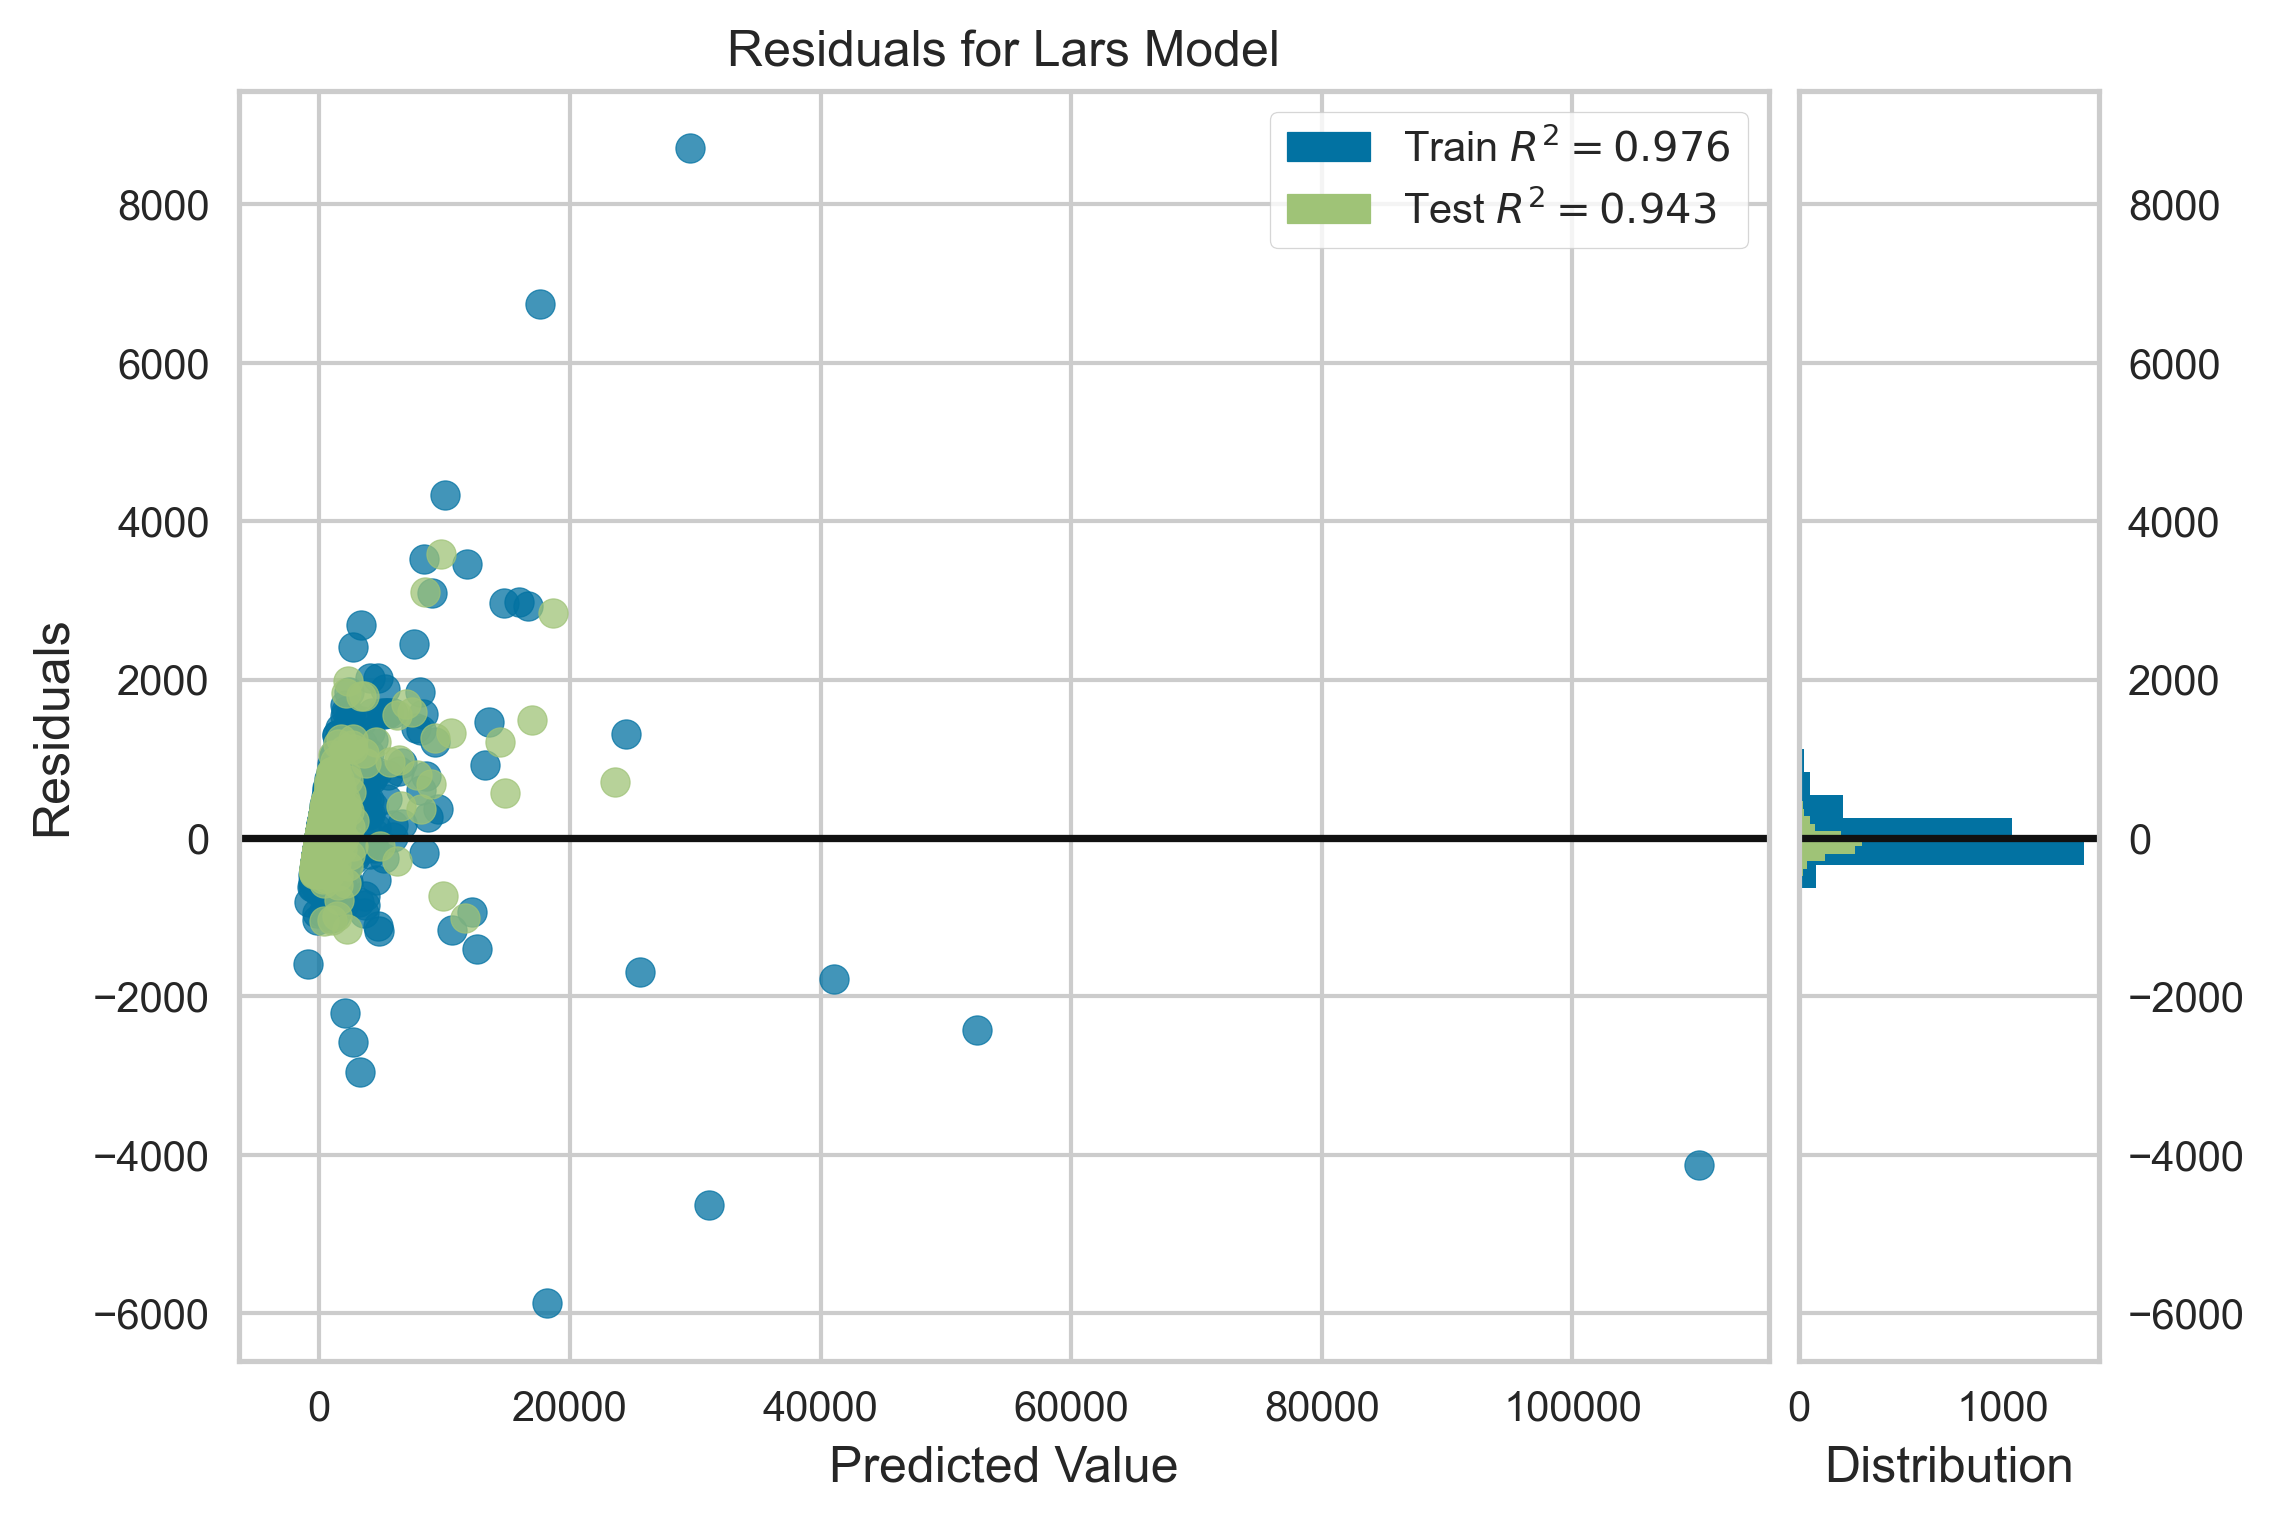

In [44]:
plot_model(tuned, plot='residuals',  scale = 3)

#os resultados parecem muito distantes uns dos outros 

In [45]:
final_model_baseline = finalize_model(tuned)

### Previsão

In [46]:
pred_treino = predict_model(final_model_baseline, data = treino)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,152.5725,114114.6187,337.8086,0.9822,1.2096,2.5841


In [47]:
pred_treino

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
520960,2.0,230.0,5.451128,73.979591,0.0,0.0,494.913330,548.953308,518.799988,490.626678,...,0,0,0,0,0,0,0,0,21,-73.376831
520357,1.0,241.0,5.153235,43.700340,0.0,0.0,450.060883,511.886963,464.034790,476.095642,...,0,0,1,0,0,0,1,0,28,-45.258404
292190,0.0,932.0,1.213860,44.581772,1.0,1.0,452.220367,525.696472,473.419312,486.438904,...,0,0,0,0,0,0,1,0,62,5.018328
430915,2.0,210.0,8.578034,27.028902,0.0,0.0,457.569244,540.623047,505.000000,503.930756,...,0,0,0,0,0,0,0,0,21,35.045800
355310,1.0,259.0,4.829229,70.436852,0.0,0.0,454.317383,554.737488,504.591675,503.704346,...,0,0,0,1,0,1,0,0,59,-16.251304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353440,96.0,17089.0,27.747423,119.417023,338.0,1792.0,499.198700,578.124023,540.559631,550.027100,...,0,0,0,0,0,0,0,0,13108,12697.756967
292740,1545.0,24167.0,15.344734,141.351517,3437.0,8047.0,502.102631,574.671143,533.534668,546.294006,...,1,0,0,1,1,0,0,0,42900,37601.366519
430510,108.0,7345.0,25.352610,143.820389,639.0,1784.0,516.128784,590.175781,554.091492,562.950195,...,0,0,0,0,0,0,1,0,7753,8668.387404


Text(0, 0.5, 'Valores preditos')

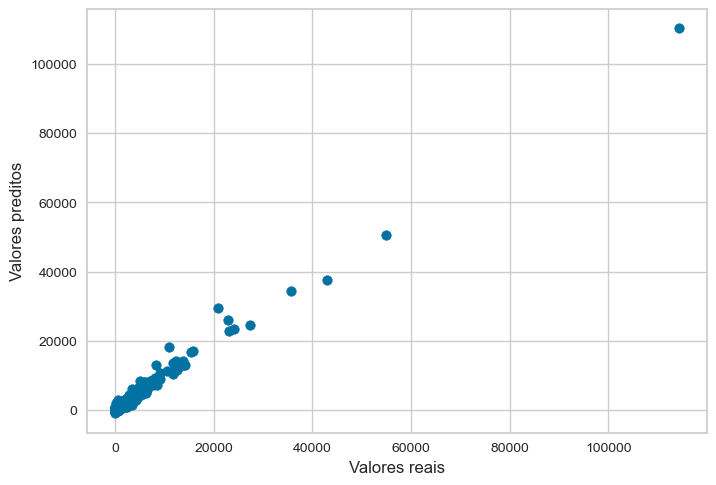

In [48]:
plt.scatter(pred_treino['qtd_abertas_Empresario_Individual'],pred_treino['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')

Previsão de dados não vistos

In [49]:
pred_unseen = predict_model(final_model_baseline, data = teste)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,167.2269,239463.9820,489.3506,0.9949,1.1784,2.5346


In [50]:
pred_unseen

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110005,2.0,591.0,7.847822,89.952827,0.0,38.0,466.433807,551.494751,498.394745,493.949310,...,0,0,0,0,1,0,0,0,181,89.795365
110007,3.0,382.0,3.693681,58.205925,0.0,0.0,452.132141,521.396790,473.606445,502.000000,...,0,1,0,1,0,0,0,0,69,123.296432
110008,2.0,573.0,2.885822,39.555943,5.0,2.0,461.861115,531.008606,483.984497,497.549988,...,1,1,0,0,1,0,0,0,92,140.893300
110011,15.0,1484.0,8.446161,96.645096,3.0,110.0,461.309814,523.865906,483.400665,492.503784,...,0,0,0,0,0,0,1,0,446,687.478895
110013,9.0,1214.0,6.078868,20.842190,3.0,31.0,482.334778,536.036377,500.517365,505.415649,...,0,0,0,1,1,0,0,0,179,561.516729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522119,1.0,271.0,6.017655,71.577766,0.0,0.0,453.318359,527.261536,496.049988,490.965302,...,0,1,0,0,0,1,0,0,88,78.355249
522190,0.0,184.0,1.776849,73.556313,0.0,0.0,485.731995,530.151978,512.495972,514.208008,...,0,0,0,0,0,1,0,0,24,-49.721561
522200,2.0,528.0,7.191805,33.744499,0.0,0.0,474.571777,522.414612,493.386505,503.091766,...,0,0,0,0,0,1,0,0,150,290.580313


Text(0, 0.5, 'Valores preditos')

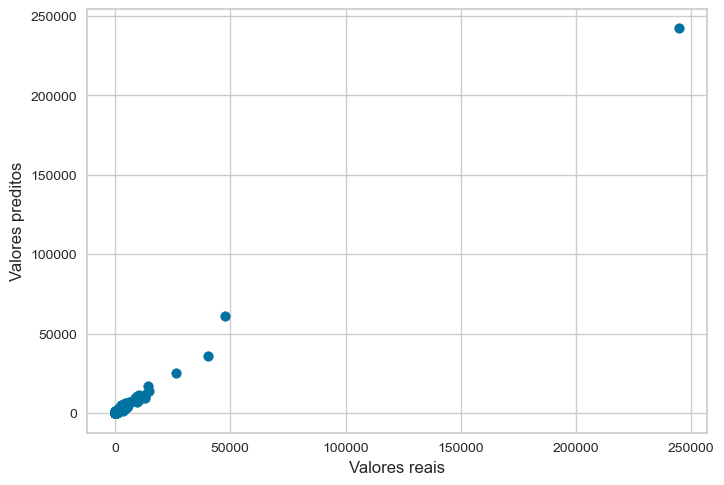

In [51]:
plt.scatter(pred_unseen['qtd_abertas_Empresario_Individual'],pred_unseen['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')